In [1]:
#Feed forward neural network - the input is 
#CIFAR10 is a database of 60000 32*32 pixel colour images in 10 classes. we can classify the with the model

import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [2]:
dataset_url = "http://files.fast.ai/data/cifar10.tgz"

download_url(dataset_url, '.')

In [3]:
#r:gz is for reading a file that has gzip compression
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path="./data")

In [4]:
data_dir = "./data/cifar10"
#training dataset
classes = (os.listdir(data_dir+"/train"))

len(os.listdir(data_dir + "/train" + "/airplane"))

root = data_dir + "/train"
dataset = ImageFolder(root, transform=ToTensor())

root_two = data_dir + "/test"
test_dataset = ImageFolder(root_two, transform=ToTensor())



classes

['ship',
 'cat',
 'automobile',
 'truck',
 'airplane',
 'horse',
 'frog',
 'bird',
 'deer',
 'dog']

In [5]:
print(dataset[1])

(tensor([[[0.4510, 0.4627, 0.4745,  ..., 0.5412, 0.5294, 0.5333],
         [0.4627, 0.4706, 0.4784,  ..., 0.5490, 0.5412, 0.5373],
         [0.4784, 0.4784, 0.4863,  ..., 0.5608, 0.5490, 0.5451],
         ...,
         [0.4235, 0.4157, 0.4118,  ..., 0.4078, 0.3333, 0.2431],
         [0.3961, 0.3882, 0.3882,  ..., 0.3804, 0.2824, 0.2314],
         [0.3765, 0.3804, 0.3882,  ..., 0.3294, 0.2667, 0.2431]],

        [[0.5412, 0.5529, 0.5647,  ..., 0.6235, 0.6157, 0.6157],
         [0.5529, 0.5608, 0.5686,  ..., 0.6314, 0.6235, 0.6235],
         [0.5686, 0.5686, 0.5765,  ..., 0.6431, 0.6314, 0.6314],
         ...,
         [0.3843, 0.3765, 0.3725,  ..., 0.3843, 0.3098, 0.2314],
         [0.3569, 0.3490, 0.3490,  ..., 0.3569, 0.2627, 0.2235],
         [0.3373, 0.3412, 0.3490,  ..., 0.3137, 0.2588, 0.2392]],

        [[0.7490, 0.7569, 0.7686,  ..., 0.7922, 0.7843, 0.7922],
         [0.7569, 0.7647, 0.7725,  ..., 0.8000, 0.7922, 0.8000],
         [0.7725, 0.7725, 0.7804,  ..., 0.8118, 0.8039, 0

In [6]:
print(dir(dataset).index('classes'))

33


In [7]:
classes = dataset.classes

In [8]:
#creating a training and validation dataset:
import numpy as np

def split_indices(dataset, split_rate, seed=99):
    sr = int(split_rate*len(dataset))
    #in order to recreate the same seed with future numpy arrays
    np.random.seed(seed)
    x = np.random.permutation(len(dataset))
    return x[sr:], x[:sr]

#create indices for sampling

val_pct = 0.2
seed = 42

train_indices, val_indices = split_indices(dataset, val_pct, seed)
print(train_indices)

#now that we have set the seed it will generate the same random numbers(to reproduce the same values. It will be different with the training ds)



[39087 30893 45278 ... 38158   860 15795]


In [9]:
from torch.utils.data import SubsetRandomSampler
from torch.utils.data import DataLoader


train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

#the loader before we put it on the GPU
train_loader = DataLoader(dataset, 100, sampler=train_sampler)
val_loader = DataLoader(dataset, 100, sampler=val_sampler)

for xb, yb in train_loader:
    print(yb)
    break


tensor([9, 6, 3, 1, 4, 6, 3, 7, 3, 2, 6, 5, 3, 0, 8, 7, 9, 4, 2, 3, 3, 3, 5, 4,
        5, 6, 3, 7, 8, 8, 8, 6, 3, 4, 8, 9, 8, 6, 8, 5, 2, 0, 8, 4, 3, 1, 4, 1,
        6, 1, 0, 9, 0, 9, 0, 0, 8, 7, 4, 6, 6, 3, 3, 7, 5, 1, 9, 6, 7, 3, 8, 6,
        7, 7, 4, 8, 1, 6, 9, 8, 1, 6, 4, 7, 6, 2, 8, 8, 0, 6, 2, 6, 1, 8, 1, 3,
        5, 2, 7, 1])


['frog', 'ship', 'airplane', 'bird', 'horse', 'deer', 'bird', 'frog', 'airplane', 'bird', 'bird', 'airplane', 'truck', 'truck', 'truck', 'horse', 'truck', 'frog', 'truck', 'ship', 'cat', 'horse', 'horse', 'bird', 'bird', 'horse', 'dog', 'frog', 'ship', 'cat', 'horse', 'deer', 'ship', 'bird', 'ship', 'airplane', 'cat', 'frog', 'dog', 'dog', 'dog', 'cat', 'frog', 'airplane', 'automobile', 'dog', 'truck', 'ship', 'horse', 'cat', 'frog', 'horse', 'horse', 'automobile', 'automobile', 'bird', 'horse', 'airplane', 'frog', 'airplane', 'cat', 'automobile', 'ship', 'truck', 'automobile', 'bird', 'airplane', 'frog', 'deer', 'dog', 'airplane', 'bird', 'automobile', 'automobile', 'automobile', 'ship', 'frog', 'truck', 'truck', 'dog', 'ship', 'airplane', 'frog', 'bird', 'deer', 'cat', 'deer', 'horse', 'airplane', 'frog', 'cat', 'deer', 'automobile', 'dog', 'automobile', 'ship', 'horse', 'frog', 'deer', 'bird']


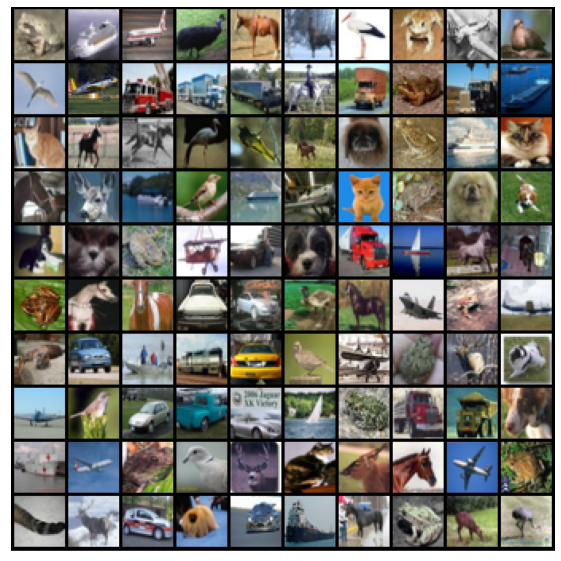

In [10]:
from torchvision.utils import make_grid

import matplotlib.pyplot as plt
items = []
def show_batch(dl):
    for images, labels in dl:
        for i in labels:
            items.append(classes[i])
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=10).permute(1, 2, 0))

        print(items)
        break

show_batch(train_loader)

#it is mostly working in the sense that i can show the dataset


#2d convolutiuonal neural networks are simple - Kernel - matrix of weights - we will use the conv2d torch builtin for the cnn



In [11]:
import torch.nn as nn
import torch.nn.functional as F

#what conv2d does is "it applies a 2D convolution over an input signal
#composed of several input planes"

In [12]:
#Kernel of weights slides over the input, and gets an output which can fit into a matrix, then you would sum up the elements to 

#Pad the image, pixels around it -> 5x5 image returns a 5x5 output with padding

#Striding - move 2p at a time - 5x5 to 2x2 or 3x3


#Multiple channels -> (MNIST was 1 chanel) -> (Cifar10 has rgb channels) -> 1 matrix applied to red, greep and blue separately, 3 outputs, sum them together to get the output 
#matrix - Padding givers by 5x5 3 times, we add them together and we get the output matrix

#Fewer parameters - unlike fullyconnected neural networks - you have a weight that is applied to each item in the input field, we use a small set of parameters compared
#Fully connected layers have different weights for every element in the input, whereas this we can use a small set of parameters, much fewer parameters

#each output depends on a small number of input elements, whereas in full-connected outputs use all of the inputs for the output, because of the weights and the bias multiplied
#fewer gradients and matrix multiplications

#Making predictions are shared 


#if they are learning something at the etop of the image, they can apply the same learning at different parts of the image

#max pools - takes the maximum pixel from each of the sliding areas, to decrease the height and width of the output tensors from each conv layer

#after doing some padding or striding to slide around the image, you can reduce the size by doing max pooling

In [13]:
#the channel numbers gets increased, but the feature map is changed

In [14]:
#input image -> convolutional layer -> pooling layer -> convolutional layer -> pooling layer -> fully connected layer

#changing the 3 channels to 16 makes a feature map
#the feture map will slowly reduce the size

#probability that the item belongs to a certain class

#applying the weights to each value, then reducing the size of the output by collecting the maximum of the output layers after we have multiplied the weights.
#it is slowly shrunken down to the batch_size x 16, 
#then you put it through a Linear layer (fully connected) in order to get the output of 10, from the inp of 16. The weights are also applied to that as well
#(forward is calculating the output layers of the input data) and backward is the computation of the gradients and computing the changes in the gradients

#for each of the output channels there is a kernel
model = nn.Sequential(
    nn.Conv2d(3,16,kernel_size=3, stride=1, padding=1), 
    nn.ReLU(), 
    nn.MaxPool2d(2,2),  #output: batch_size * 16 x  16 x 16

    nn.Conv2d(16,16, kernel_size = 3, stride=1, padding=1), 
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output: batch_size * 16 x 8 x 8

    nn.Conv2d(16,16, kernel_size = 3, stride=1, padding=1), 
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output: batch_size x 16 x 4 x 4

    nn.Conv2d(16,16, kernel_size = 3, stride=1, padding=1), 
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(16,16, kernel_size = 3, stride=1, padding=1), 
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Flatten(), #it is now a vector
    nn.Linear(16,10) #outputs the 10 probabilities 
)

#max pooling is not the best becasue you are throwing away the data

#Steps: Have an image with a acertain height width, channel number and amount of pixels. Increase the channel number to create a feature map.


# There are two main reasons for this [increase the channel number]:

# As you apply pooling, your data gets smaller and you can afford to have more channels, keeping the same amount of information but making it more relevant to your problem.
# Deeper layers have larger receptive fields and generally correspond to more specific features. 
# Early layers learn things like lines while later layers learn much more complex features like faces.
# There are going to be a lot more of those complex features than there are simple features, so you want more channels to capture them all.

#more channels if you want your model to recognize the complex feratures.
#then, you have to pass through the kernel to get an output matrix, of the same size, run max pool to reduce the size of the output matrix, then do that again and again until you
#have a channel(landform definition) size * 1 * 1. Then you can reshape or unsqueeze the current output matrix until you have a vector of size 16. then you pass the vector into the
#feed forward layer, and then you get the 10 outputs - which are the probabilities of the 10 classes


#the maxpool2d is responsible for making the output tensor smaller.

#remember that there are weights and biases that are responsible for the predictions of the model itself. instead of having one tensor fof weights/biases that are applied to one single
#item in the input tensor, CNN's have a kernel of weights that gets reused for every single item in the matrix.

#So instead of optimizing every single item in the weights matrix, we optimize the kernel for every 

In [15]:
for images, labels in train_loader:
    print(images.shape)
    out = model(images)
    #input is 100 images(per batch), and the output is the 10 probabilities, that we have not optimized yet
    print(out.shape)
    print(F.softmax(out[0]))
    #we want to think of them as probabilities
    break

torch.Size([100, 3, 32, 32])
torch.Size([100, 10])
tensor([0.1136, 0.1179, 0.1034, 0.0840, 0.0748, 0.0862, 0.1040, 0.0836, 0.1045,
        0.1281], grad_fn=<SoftmaxBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [16]:
#put the model and the data to the gpu
#the gpu makes it faster to train the model
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    return torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [17]:
#whenever we are loading a batch of data, that is when we are in fact putting the data in the GPU

device = get_default_device()
print(device)

train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)



cuda


In [18]:
def accuracy(output, label):
    _,preds = torch.max(output, dim=1)
    return torch.sum(preds == label).item()/len(label)


In [19]:
def loss_batch(model, loss_fn, xb, yb, opt):
    #pass in the image to the model and get the intial predictions
    preds = model(xb)

    #calculate the loss in order to optimize the model
    loss = loss_fn(preds, yb)
    acc = accuracy(preds, yb)
    #calculate the gradients with a backwards pass
    #The "forward pass" refers to calculation process, values of the output layers from the inputs data. It's traversing through all neurons from first to last layer.
    # A loss function is calculated from the output values.
    # And then "backward pass" refers to process of counting changes in weights (de facto learning), using gradient descent algorithm (or similar). Computation is made from last layer, backward to the first layer.
    loss.backward()
    opt.step()
    #update the values of the optimizer
    opt.zero_grad()
    #set the gradient values in the optimizer back to 0

In [20]:
def train(model, train_loader, lr, loss_fn, num_epochs):
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        model.train()
        for xb,yb in train_loader:
            loss_batch(model, loss_fn, xb, yb, opt)

In [21]:
#move the model to the GPU
model = to_device(model, device)
train(model, train_dl, 1e-3, F.cross_entropy, 10)

In [23]:
acc_arr = []
for xb, yb in val_dl:
    out = (model(xb))
    loss = F.cross_entropy(out, yb)
    acc = accuracy(out,yb)
    acc_arr.append(acc)

print(sum(acc_arr)/len(acc_arr))

    #ehh 54% accuracy is hot garbaginhos but its better than nothing. when we use the rnn, it would get better. A lot better hopefully
    #woah now it is even lower at just about 50%
    #initial is 9% accuracy 


0.5049000000000001


In [111]:
#Adam optimizer - changes the learning rate, whereas SGD keeps it the same
#if you try and train for a lot more epochs your training loss will go down, but your validation loss with in fact go up
#this is a bad bad bad thing, because when the model starts to memorize a certain datasets, thats when you know that you have to train all over again.

#to avound overfitting, you need to gather and generate more training data, and add more noise to it - 

#or by agumenting the data, or getting more training samples. However this can be difficult when you are given a dataset, but it could work if you are the one who is collecting data

# or you can use regularization techniques like batch normalization and dropout
#stop the model's training early, right when the validation loss starts to increase
#(stop early, reduce the learning rate, to see if the lower learning rate is reducing overfitting)


#we will try and improve the thing to 90% acc

In [30]:
#test_dataset
test_ds = ImageFolder(data_dir+"/test", transform=ToTensor())

print(test_ds[9999])

(tensor([[[1.0000, 0.9765, 0.9569,  ..., 0.8980, 0.8902, 0.9098],
         [0.9333, 0.8980, 0.8902,  ..., 0.8902, 0.8863, 0.9176],
         [0.9333, 0.9255, 0.9412,  ..., 0.8941, 0.8941, 0.9373],
         ...,
         [0.3098, 0.2824, 0.2980,  ..., 0.3176, 0.2941, 0.2510],
         [0.3529, 0.3569, 0.3451,  ..., 0.3412, 0.3373, 0.3333],
         [0.3843, 0.3804, 0.3647,  ..., 0.3686, 0.3765, 0.3804]],

        [[1.0000, 0.9765, 0.9569,  ..., 0.9294, 0.9216, 0.9255],
         [0.9333, 0.8980, 0.8902,  ..., 0.9294, 0.9216, 0.9333],
         [0.9333, 0.9255, 0.9412,  ..., 0.9333, 0.9216, 0.9451],
         ...,
         [0.3137, 0.3020, 0.3333,  ..., 0.3059, 0.2941, 0.2510],
         [0.3608, 0.3686, 0.3686,  ..., 0.3412, 0.3373, 0.3333],
         [0.3882, 0.3922, 0.3765,  ..., 0.3725, 0.3804, 0.3804]],

        [[0.9922, 0.9686, 0.9490,  ..., 0.9059, 0.9059, 0.9176],
         [0.9255, 0.8902, 0.8824,  ..., 0.9059, 0.9020, 0.9216],
         [0.9255, 0.9176, 0.9333,  ..., 0.9137, 0.9059, 0

In [79]:
def predict(model, image):
    #unsqueeze adds an extra dimension to the tensor
    image = image.unsqueeze(0)
    img = to_device(image, torch.device("cuda"))
    out = model(img)
    _,preds = torch.max(out, dim=1)
    return (classes[preds[0].item()], classes[label], classes[preds[0].item()] == classes[label])


comp predicted : cat
answer was : airplane
it was:  False


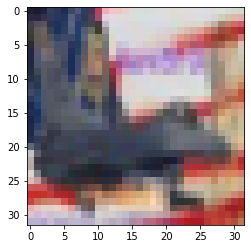

In [86]:
img, label = test_ds[20]
comp, ans, trfl = predict(model,img)
print("comp predicted :", comp)
print("answer was :", ans)
print("it was: ", trfl)
plt.imshow(img.permute(1,2,0))

In [ ]:
#making the image classifier to 90% using a resnet -> 
#right now it is at 55% accuracy, and we will improve it